## Example CIFAR10 classification dataset

In [1]:
import matplotlib.pyplot as plt
import torchvision
from luxonis_ml.data import LuxonisDataset, LuxonisLoader
from luxonis_ml.enums import LabelType

In [2]:
# Delete dataset if exists

dataset_name = "cifar10_test"
if LuxonisDataset.exists(dataset_name):
    dataset = LuxonisDataset(dataset_name)
    dataset.delete_dataset()

### Get the data

In [3]:
cifar10_torch = torchvision.datasets.CIFAR10(root="../data", train=False, download=True)

Files already downloaded and verified


### Convert to LuxonisDataset format

`LuxonisDataset` will expect a generator that yields data in the following format:
```
- file [str] : path to file on local disk or object storage
- class [str]: string specifying the class name or label name
- type [str] : the type of label or annotation
- value [Union[str, list, int, float, bool]]: the actual annotation value
    For here are the expected structures for `value`.
    The function will check to ensure `value` matches this for each annotation type

    value (classification) [bool] : Marks whether the class is present or not
        (e.g. True/False)
    value (box) [List[float]] : the normalized (0-1) x, y, w, and h of a bounding box
        (e.g. [0.5, 0.4, 0.1, 0.2])
    value (polyline) [List[List[float]]] : an ordered list of [x, y] polyline points
        (e.g. [[0.2, 0.3], [0.4, 0.5], ...])
    value (keypoints) [List[List[float]]] : an ordered list of [x, y, visibility] keypoints for a keypoint skeleton instance
        (e.g. [[0.2, 0.3, 2], [0.4, 0.5, 2], ...])
```

In [4]:
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]


def CIFAR10_subset_generator():
    for i, (image, label) in enumerate(cifar10_torch):
        if i == 1000:
            break
        path = f"../data/cifar_{i}.png"
        image.save(path)
        yield {
            "file": path,
            "class": classes[label],
            "type": "classification",
            "value": True,
        }

In [5]:
dataset = LuxonisDataset(dataset_name)
dataset.set_classes(classes)

dataset.add(CIFAR10_subset_generator)

Generating UUIDs...
Took 0.07454681396484375 seconds
Saving annotations...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 76055.41it/s]

Took 0.015446662902832031 seconds


### Define Splits

In [6]:
# without providing manual splits, this will randomly split the data
dataset.make_splits()

### Test Loader

Sample classification tensor
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]



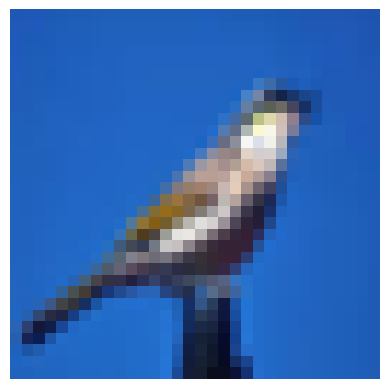

In [7]:
loader = LuxonisLoader(dataset, view="train")
for image, ann in loader:
    cls = ann[LabelType.CLASSIFICATION]

    print("Sample classification tensor")
    print(cls)
    print()

    h, w, _ = image.shape

    plt.imshow(image)
    plt.axis("off")  # Optional: Hide axis
    plt.show()
    break